# Michelson Interferometer - Compute Intensity
## V Vijendran (Vijey)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def average_intensity_in_circle(image, center, radius):
    """
    Calculate the average intensity of the pixels inside a circle.
    
    Parameters:
    - image (numpy.ndarray): 2D grayscale image array.
    - center (tuple): A tuple (x, y) representing the center of the circle.
    - radius (float): Radius of the circle.
    
    Returns:
    - float: The average pixel intensity inside the circle.
    """
    # Generate a coordinate grid centered at the specified 'center'
    y, x = np.ogrid[-center[1]:image.shape[0]-center[1], -center[0]:image.shape[1]-center[0]]
    # Create a boolean mask where only pixels inside the circle are True
    mask = x*x + y*y <= radius*radius
    # Calculate and return the mean intensity of the pixels inside the circle
    return np.mean(image[mask])


def detect_fringe_changes(video_path, spot_center, spot_radius):
    """
    Extract the average intensity values of a circular spot from a video.
    
    Parameters:
    - video_path (str): Path to the video file.
    - spot_center (tuple): A tuple (x, y) indicating the center of the spot in the video.
    - spot_radius (float): Radius of the circular spot.
    
    Returns:
    - list: A list of average intensity values from each frame of the video.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Couldn't open video.")
        return None
    # List to store the average intensity values for each frame
    intensity_list = []
    # Loop through each frame in the video
    while True:
        # Read the next frame
        ret, frame = cap.read()
        # If there are no more frames, break out of the loop
        if not ret:
            break
        # Convert the frame to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculate the average intensity inside the circle for the current frame
        intensity = average_intensity_in_circle(gray, spot_center, spot_radius)
        # Append the calculated intensity to the list
        intensity_list.append(intensity)
    # Release the video capture object
    cap.release()
    return intensity_list
    
    
def show_first_frame_with_spot(video_path, spot_center, spot_radius):
    """
    Display the first frame of a video with a visualized circular spot.
    
    Parameters:
    - video_path (str): Path to the video file.
    - spot_center (tuple): A tuple (x, y) representing the center of the circle.
    - spot_radius (float): Radius of the circle.
    """
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Couldn't open video.")
        return
    # Read the first frame from the video
    ret, frame = cap.read()
    # Release the video capture object
    cap.release()
    # If the first frame was successfully captured
    if ret:
        # Draw a circle on the frame to visualize the spot
        cv2.circle(frame, spot_center, spot_radius, (0, 165, 255), 4)
        # Convert the frame from BGR (OpenCV default) to RGB (for Matplotlib)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Display the frame using Matplotlib
        plt.figure(figsize=(10, 7))
        plt.imshow(rgb_frame)
        plt.title('First Frame with Spot')
        plt.axis('off')  # Hide the axis values
        plt.show()

## 1. Select Region to Check for Intensity Changes

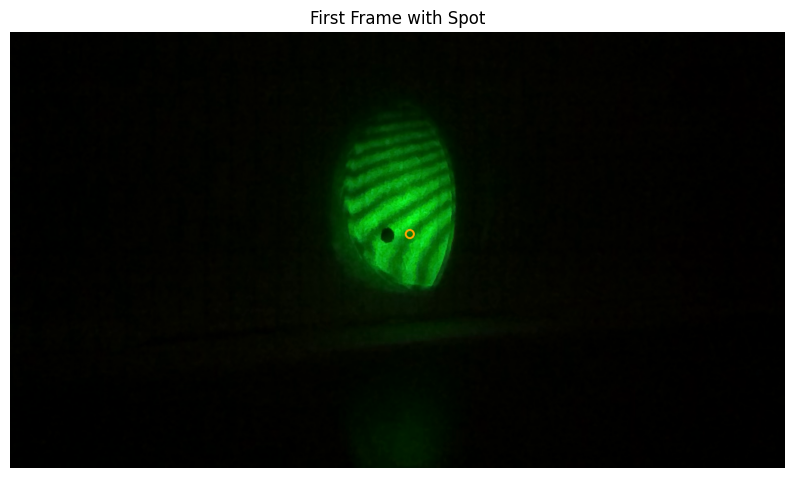

In [2]:
video_path = 'test.mp4' # Set path to the video file
spot_center = (990, 500)  # Choose a center for your circle region
spot_radius = 10  # Choose circle radius

# Use this function to check if you have selected the circle at the right coordinate
show_first_frame_with_spot(video_path, spot_center, spot_radius)

## 2. Compute Intensity Changes for Selected Region and Plot Them

In [3]:
intensity_list = detect_fringe_changes(video_path, spot_center, spot_radius)

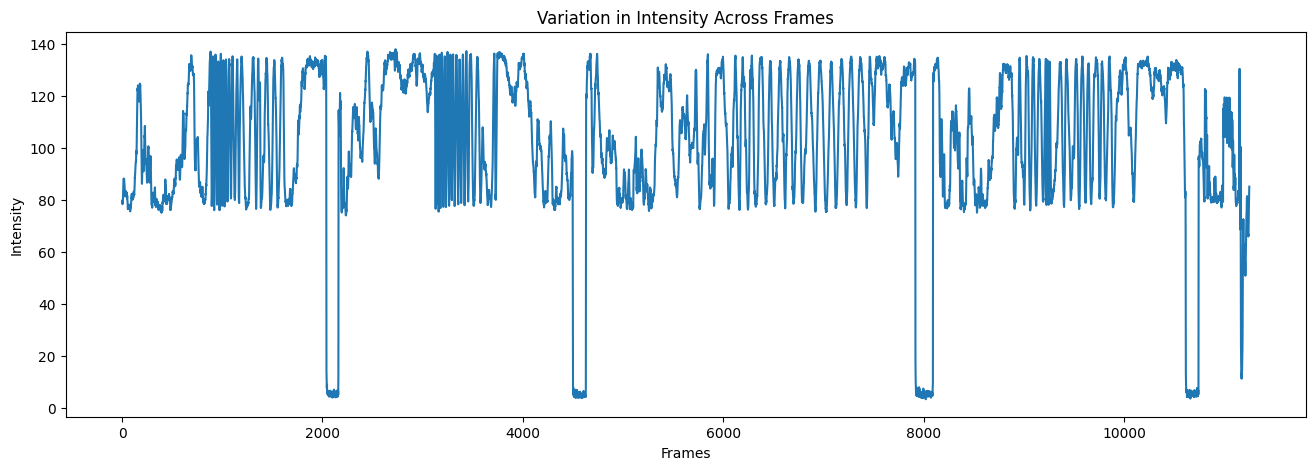

In [4]:
plt.figure(figsize=(16, 5))
plt.plot(range(len(intensity_list)), intensity_list)
plt.xlabel("Frames")
plt.ylabel("Intensity")
plt.title("Variation in Intensity Across Frames");

## 3. Plot Intensity for Specific Interval for Easier Counting

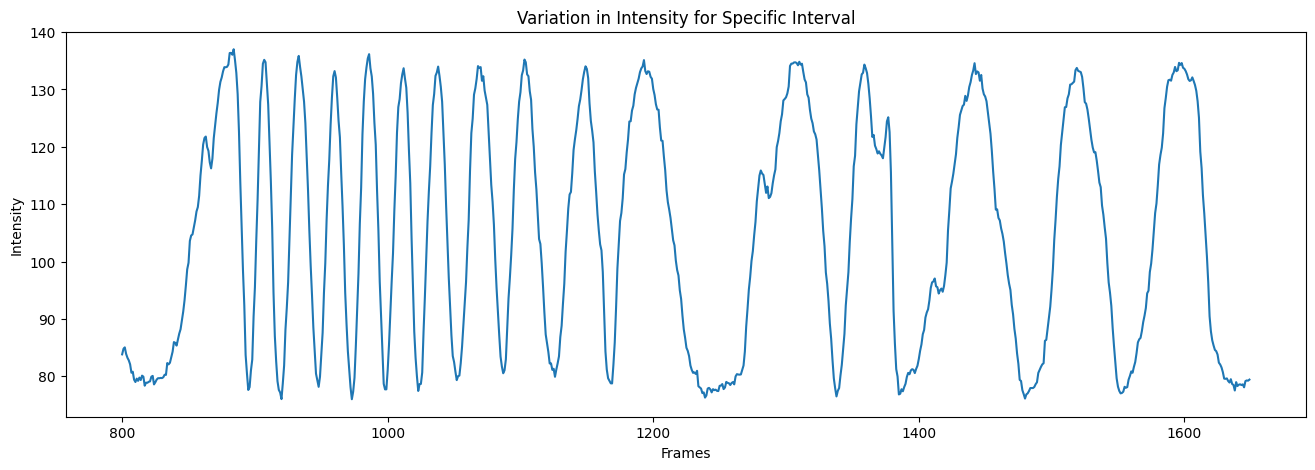

In [5]:
initial_idx = 800
final_idx = 1650

plt.figure(figsize=(16, 5))
plt.plot(range(initial_idx, final_idx), intensity_list[initial_idx:final_idx])
plt.xlabel("Frames")
plt.ylabel("Intensity")
plt.title("Variation in Intensity for Specific Interval");